In [24]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [25]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [26]:
# hyperparameters
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [27]:
# MNIST Data
train_dataset = torchvision.datasets.MNIST(root = 'Downloads', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root = 'Downloads', train=False, transform=transforms.ToTensor(), download=False)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

torch.Size([100, 1, 28, 28]) torch.Size([100])


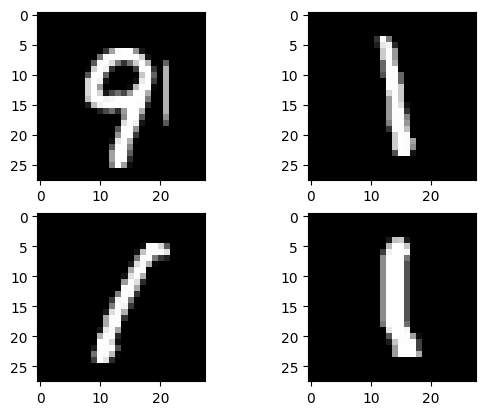

In [34]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape,labels.shape)

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [29]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [30]:
model = NeuralNet(input_size, hidden_size, num_classes)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
 

In [31]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backwards pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)%100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')



epoch 1 / 2, step 100/600, loss = 0.3789
epoch 1 / 2, step 200/600, loss = 0.3567
epoch 1 / 2, step 300/600, loss = 0.1840
epoch 1 / 2, step 400/600, loss = 0.3083
epoch 1 / 2, step 500/600, loss = 0.3829
epoch 1 / 2, step 600/600, loss = 0.3174
epoch 2 / 2, step 100/600, loss = 0.1495
epoch 2 / 2, step 200/600, loss = 0.1394
epoch 2 / 2, step 300/600, loss = 0.1116
epoch 2 / 2, step 400/600, loss = 0.1100
epoch 2 / 2, step 500/600, loss = 0.1490
epoch 2 / 2, step 600/600, loss = 0.1016


In [32]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # value, index
        _,predictions = torch.max(outputs,1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

acc = 100.0 * n_correct/n_samples
print(f'Accuracy = {acc}')

Accuracy = 95.25


In [35]:
print(device)

cpu
